In [139]:
import nltk
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [140]:
data_path = "spam.csv"
data = pd.read_csv(data_path,encoding='ISO-8859-1')

In [141]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [142]:
data.shape

(5572, 5)

In [143]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [145]:
#dropping last three columns from dataset
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [146]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [147]:
'''
Renaming columns 
'''

data.rename(columns={'v1':'target','v2':'txt'},inplace=True)
data.head()


,target,txt
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [148]:

data["target"].unique()

array(['ham', 'spam'], dtype=object)

In [149]:
#changing the text to binary encoded values
encoder = LabelEncoder()

#categories will become binary values
data["target"] = encoder.fit_transform(data["target"])

data.head()

,target,txt
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [150]:
print(f'Number of duplicates: {data.duplicated().sum()}')

Number of duplicates: 403


In [151]:
#removing duplicate values
data = data.drop_duplicates(keep="first")
print(f"Number of duplicate values: {data.duplicated().sum()}")


Number of duplicate values: 0


## EDA

In [152]:
data["target"].value_counts()

0    4516
1     653
Name: target, dtype: int64

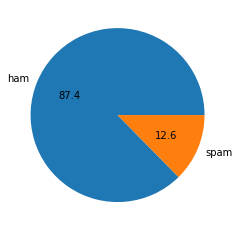

In [153]:
plt.pie(data["target"].value_counts(),labels=["ham","spam"],autopct="%0.1f")
plt.show()

In [154]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/shrenik/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [155]:
'''
Number of character of same type 
'''

data["nos_chars"] = data["txt"].apply(len)
data.head()

,target,txt,nos_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [156]:
'''
Returns list of words used in the messages
'''

data["txt"].apply(lambda x:nltk.word_tokenize(x))


0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: txt, Length: 5169, dtype: object

In [157]:

'''
Count Number of words in message
'''
data["nos_wrds"] = data["txt"].apply(lambda x:len(nltk.word_tokenize(x)))
data.head()

,target,txt,nos_chars,nos_wrds
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [158]:
'''

Count number of sentences in message 

'''

data["nos_sentncs"] = data['txt'].apply(lambda x:len(nltk.sent_tokenize(x)))
data.head()

,target,txt,nos_chars,nos_wrds,nos_sentncs
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [159]:

print("The statistics of these data:\n")
data[['nos_chars','nos_wrds','nos_sentncs']].describe()

The statistics of these data:



,nos_chars,nos_wrds,nos_sentncs
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455407,1.961308
std,58.236293,13.322448,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [160]:

'''
describe function for 'ham' category
'''

data[data['target'] == 0][['nos_chars','nos_wrds','nos_sentncs']].describe()

,nos_chars,nos_wrds,nos_sentncs
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123339,1.815545
std,56.358207,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [161]:
'''
describe function for 'spam' category
'''

data[data['target'] == 1][['nos_chars','nos_wrds','nos_sentncs']].describe()

,nos_chars,nos_wrds,nos_sentncs
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.969372
std,30.137753,7.008418,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


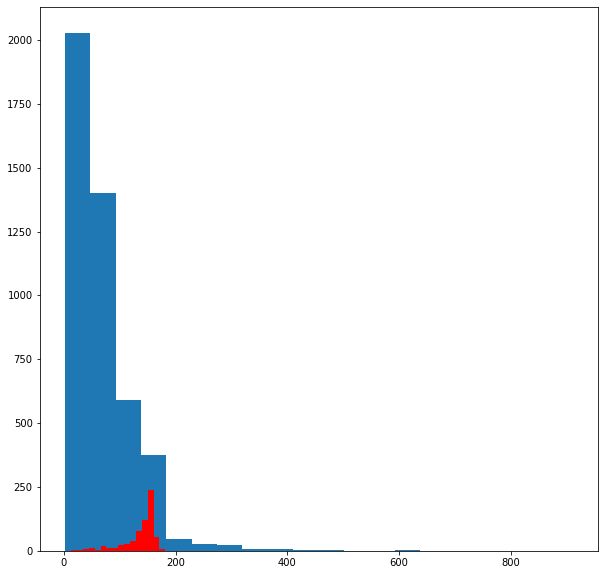

In [162]:
plt.figure(figsize=(10,10))
plt.hist(data[data["target"] ==  0 ]["nos_chars"],bins=20) # ham data
plt.hist(data[data["target"] ==  1 ]["nos_chars"],bins=20,color='red') # spam data
plt.show()

<AxesSubplot:xlabel='nos_wrds', ylabel='Count'>

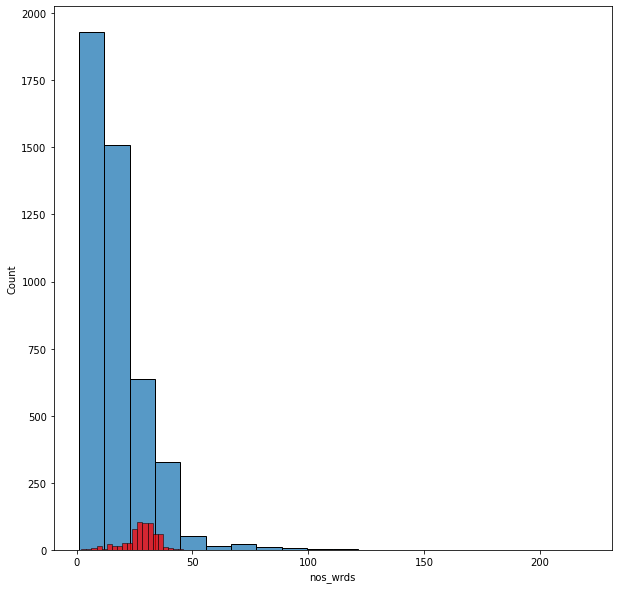

In [163]:

plt.figure(figsize=(10,10))
sns.histplot(data[data["target"] ==  0 ]["nos_wrds"],bins=20) #ham
sns.histplot(data[data["target"] ==  1 ]["nos_wrds"],bins=20,color='red') # spam

<AxesSubplot:xlabel='nos_chars', ylabel='Count'>

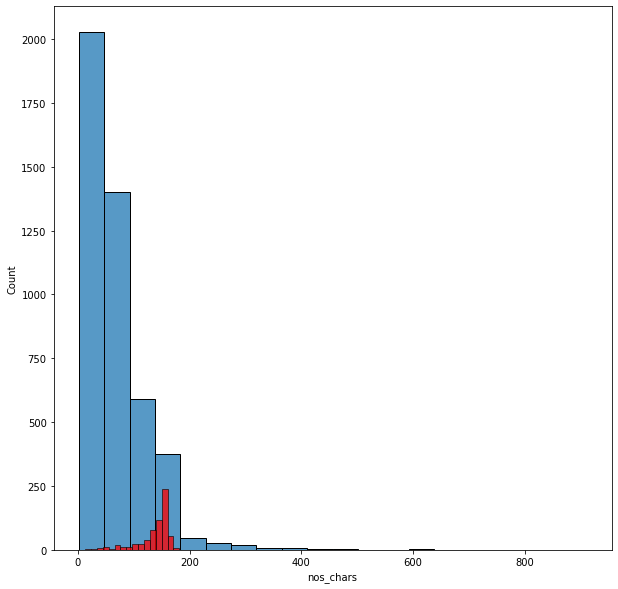

In [164]:

plt.figure(figsize=(10,10))
sns.histplot(data[data["target"] ==  0 ]["nos_chars"],bins=20) #ham
sns.histplot(data[data["target"] ==  1 ]["nos_chars"],bins=20,color='red') #spam

<AxesSubplot:xlabel='nos_sentncs', ylabel='Count'>

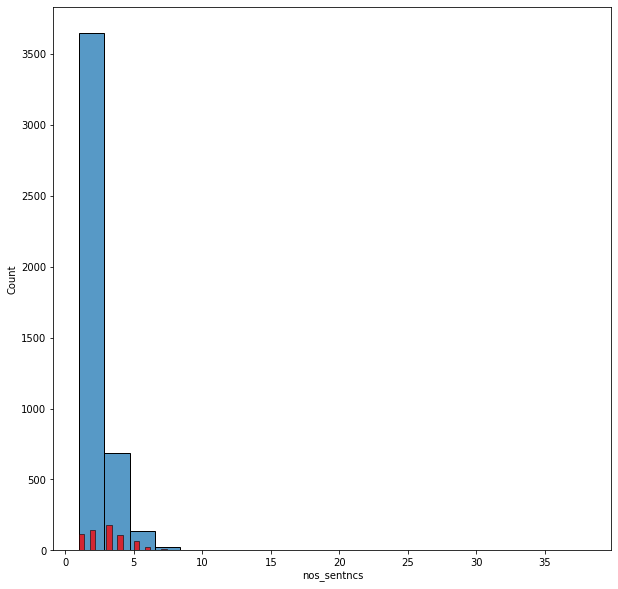

In [165]:

plt.figure(figsize=(10,10))
sns.histplot(data[data["target"] ==  0 ]["nos_sentncs"],bins=20) #ham
sns.histplot(data[data["target"] ==  1 ]["nos_sentncs"],bins=20,color='red') #spam


<AxesSubplot:>

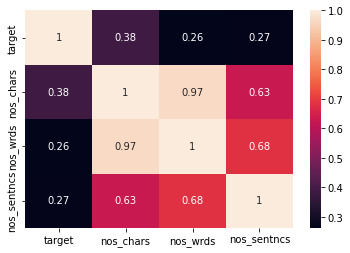

In [166]:
sns.heatmap(data.corr(),annot=True)

## Data Preprocessing

In [167]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/shrenik/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [168]:
import string
punct = string.punctuation



In [169]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem("loving")

'love'

In [170]:
'''
Converting text into lowercase, 
removing punctuations
removing special chars
'''


def txt_transform(txt):
    txt = txt.lower() #lowercase text
    txt =  nltk.word_tokenize(txt) #splitting text

    ps = PorterStemmer()
    punct = string.punctuation
    final = []


    for char in txt:
        #if character is an alpha numeric or
        #special char then append it to this array
        if char.isalnum() and char not in stopwords.words('english') and char not in punct:
            final.append(ps.stem(char))

    return " ".join(final)  
val = " HOW ARE YOU doing Jack ?? how's writing and loving grandma !!! "
txt_transform(val)

'jack write love grandma'

In [171]:
data["txt"][3]

'U dun say so early hor... U c already then say...'

In [172]:
txt_transform(data["txt"][3])

'u dun say earli hor u c alreadi say'

In [173]:


data['txt_transfrm'] = data["txt"].apply(txt_transform)
data.head()

,target,txt,nos_chars,nos_wrds,nos_sentncs,txt_transfrm
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [174]:
spam_words = []
for txt in data[data["target"] ==  1]["txt_transfrm"].tolist():
    for word in txt.split():
        spam_words.append(word)

In [175]:
spam_words

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [176]:
len(spam_words)

9939

In [177]:
#create dictionary of spam words frequency
from collections import Counter

#top 10 frequent words
Counter(spam_words).most_common(10)


[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103)]

/home/shrenik/Documents/python_code/ml_code/ml_projects/ml_webapps/spam_classifier/spam_classif/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


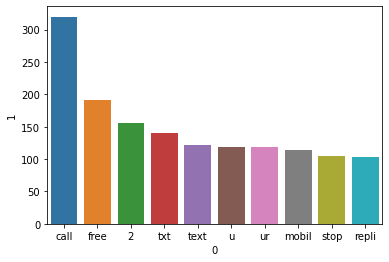

In [178]:
#plotting their frequencies
sns.barplot(pd.DataFrame(Counter(spam_words).most_common(10))[0],pd.DataFrame(Counter(spam_words).most_common(10))[1])
plt.show()


## Model


In [188]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

count_vec = CountVectorizer()
tfidf = TfidfVectorizer(max_features=2000)

In [189]:
x = tfidf.fit_transform(data["txt_transfrm"]).toarray()

# 6700 -> words
x.shape

(5169, 2000)

In [190]:
y = data["target"].values
print(y)

[0 0 1 ... 0 0 0]


In [191]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=3)

In [192]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score


In [193]:
gaussian = GaussianNB()
gaussian.fit(x_train,y_train)
y_pred_gauss = gaussian.predict(x_test)
print(f'Accuracy score for Gaussian Model: {round(accuracy_score(y_test,y_pred_gauss)*100,3)}%')
print(f'Precision score of Gaussian Model: {round(precision_score(y_test,y_pred_gauss)*100,3)}%')
print(f'Confusion Matrix :\n {confusion_matrix(y_test,y_pred_gauss)}')


Accuracy score for Gaussian Model: 84.655%
Precision score of Gaussian Model: 47.215%
Confusion Matrix :
 [[1135  199]
 [  39  178]]


In [194]:
multinomial = MultinomialNB()
multinomial.fit(x_train,y_train)
y_pred_mult = multinomial.predict(x_test)
print(f'Accuracy score for Multinomial Model: {round(accuracy_score(y_test,y_pred_mult)*100,3)}%\n')
print(f'Precision score of Multinomial Model: {round(precision_score(y_test,y_pred_mult)*100,3)}%\n')
print(f'Confusion Matrix :\n {confusion_matrix(y_test,y_pred_mult)}')


Accuracy score for Multinomial Model: 97.357%

Precision score of Multinomial Model: 100.0%

Confusion Matrix :
 [[1334    0]
 [  41  176]]


In [195]:

bernoulli = BernoulliNB()
bernoulli.fit(x_train,y_train)
y_pred_bern = bernoulli.predict(x_test)
print(f'Accuracy score for Bernoulli Model: {round(accuracy_score(y_test,y_pred_bern)*100,3)}%\n')
print(f'Precision score of Bernoulli Model: {round(precision_score(y_test,y_pred_bern)*100,3)}%\n')
print(f'Confusion Matrix :\n {confusion_matrix(y_test,y_pred_bern)}')

Accuracy score for Bernoulli Model: 97.808%

Precision score of Bernoulli Model: 98.413%

Confusion Matrix :
 [[1331    3]
 [  31  186]]


In [187]:
# We can use either Multinomial or Gaussian

#But we use Multinomial because we focus on precision

import pickle
pickle.dump(tfidf,open('vectorize.pkl','wb'))
pickle.dump(multinomial,open('model.pkl','wb'))
